In [3]:
import numpy as np
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
np.random.seed(42)

In [5]:
# Creating Independent variables
X_independent = np.random.randint(0, 5, 1000)
Y_independent = np.random.randint(0, 5, 1000)

In [6]:
# Case 2: Dependent variables
X_dependent = np.random.randint(0, 5, 1000)
Y_dependent = X_dependent + np.random.randint(0, 2, 1000)  # Y is dependent on X with some additional noise


In [7]:
# Implying Mutual Information mathematical formula
def mutual_information(X, Y):
    # Get joint distribution (joint probability)
    joint_prob = Counter(zip(X, Y))
    total_samples = len(X)
    
    # Convert joint counts to probabilities
    for key in joint_prob:
        joint_prob[key] /= total_samples
    
    # Marginal distributions
    prob_X = Counter(X)
    prob_Y = Counter(Y)
    
    # marginal frequencies to marginal probabilities
    for key in prob_X:
        prob_X[key] /= total_samples
    for key in prob_Y:
        prob_Y[key] /= total_samples

    # Mutual Information calculation
    mi = 0.0
    for (x_val, y_val), p_xy in joint_prob.items():
        p_x = prob_X[x_val]
        p_y = prob_Y[y_val]
        mi += p_xy * np.log(p_xy / (p_x * p_y))

    # Convert to base 2
    return mi / np.log(2)

In [9]:
mi_independent = mutual_information(X_independent, Y_independent)
mi_dependent = mutual_information(X_dependent, Y_dependent)


In [10]:
# Using scikit-learn's mutual_info_score for comparison
def compute_mutual_information_sklearn(X, Y):
    return mutual_info_score(X, Y)

In [11]:
mi_independent_sklearn = compute_mutual_information_sklearn(X_independent, Y_independent)
mi_dependent_sklearn = compute_mutual_information_sklearn(X_dependent, Y_dependent)

In [14]:
# Print results
print(f"Mutual Information (Independent, Direct): {mi_independent:.4f}")
print(f"Mutual Information (Independent, Sklearn): {mi_independent_sklearn:.4f}")

Mutual Information (Independent, Direct): 0.0074
Mutual Information (Independent, Sklearn): 0.0051


For Independent Variables: Both values are very close to zero, which is expected for independent variables, because mutual information quantifies how much knowing one variable tells you about the other. For independent variables, this should be observed to a minimum.

In [15]:
print(f"Mutual Information (Dependent, Direct): {mi_dependent:.4f}")
print(f"Mutual Information (Dependent, Sklearn): {mi_dependent_sklearn:.4f}")

Mutual Information (Dependent, Direct): 1.5416
Mutual Information (Dependent, Sklearn): 1.0685


For Dependent Variable: The values obtained thorugh both the methods are quite high, which is also expected as they are dependent variables. However, there is significant difference between the defined function and the scikit function.

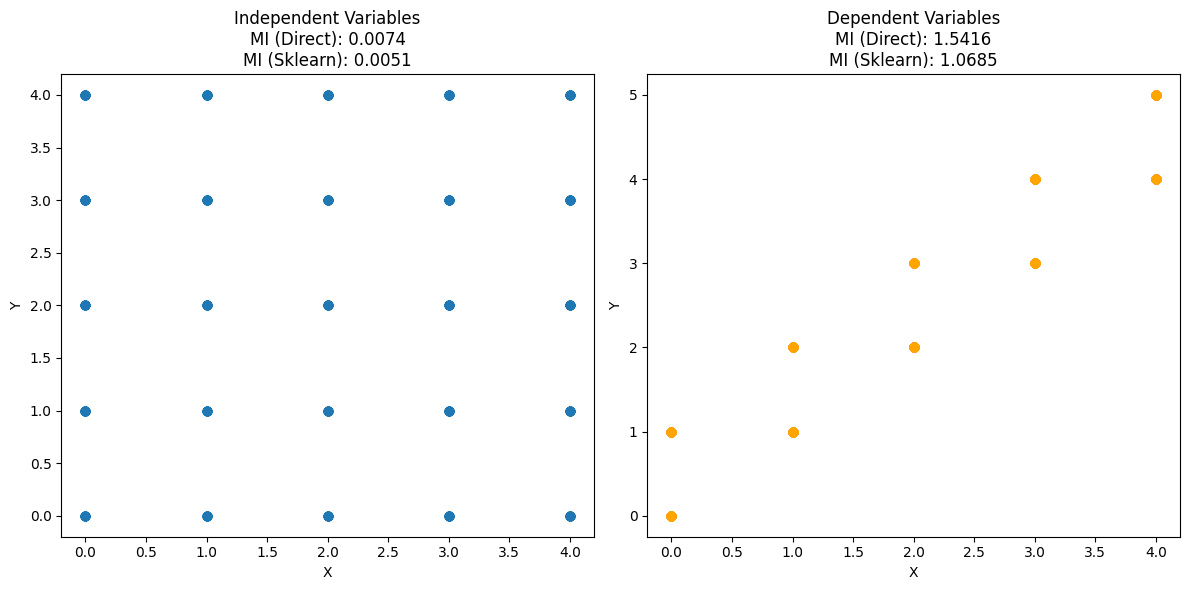

In [13]:
# Plot to visualize
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_independent, Y_independent, alpha=0.6)
plt.title(f"Independent Variables\nMI (Direct): {mi_independent:.4f}\nMI (Sklearn): {mi_independent_sklearn:.4f}")
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1, 2, 2)
plt.scatter(X_dependent, Y_dependent, alpha=0.6, color='orange')
plt.title(f"Dependent Variables\nMI (Direct): {mi_dependent:.4f}\nMI (Sklearn): {mi_dependent_sklearn:.4f}")
plt.xlabel("X")
plt.ylabel("Y")

plt.tight_layout()
plt.show()

#### Jackknife Resampling 

The jackknife method systematically removes one data point at a time, recalculates mutual information, and provides an average MI estimate and the variance of that estimate.

In [1]:
# Jackknife resampling for mutual information
def jackknife_mi(X, Y, mi_function):
    n = len(X)
    mi_values = []
    
    # Leave one out each time and calculate MI
    for i in range(n):
        # Remove the ith element from X and Y
        X_jack = np.delete(X, i)
        Y_jack = np.delete(Y, i)
        
        # Compute mutual information for this jackknife sample
        mi_jack = mi_function(X_jack, Y_jack)
        mi_values.append(mi_jack)
    
    # Jackknife estimate: mean of the MI values
    mi_jackknife = np.mean(mi_values)
    
    # Variance estimate of MI from jackknife samples
    mi_variance = (n - 1) * np.var(mi_values)
    
    return mi_jackknife, mi_variance

In [8]:
# Calculate MI using jackknife for independent data
mi_jack_independent, mi_var_independent = jackknife_mi(X_independent, Y_independent, mutual_information)
mi_sklearn_independent = mutual_info_score(X_independent, Y_independent)

In [9]:
print(f"Mutual Information (Independent, Jackknife Estimate): {mi_jack_independent}")
print(f"Mutual Information Variance (Independent, Jackknife): {mi_var_independent}")
print(f"Mutual Information (Independent, Sklearn): {mi_sklearn_independent}")

Mutual Information (Independent, Jackknife Estimate): 0.0074214068356976874
Mutual Information Variance (Independent, Jackknife): 2.1805924063824152e-05
Mutual Information (Independent, Sklearn): 0.00513602035496738


In [10]:
# Calculate MI using jackknife for dependent data
mi_jack_dependent, mi_var_dependent = jackknife_mi(X_dependent, Y_dependent, mutual_information)
mi_sklearn_dependent = mutual_info_score(X_dependent, Y_dependent)

In [11]:
print(f"Mutual Information (Dependent, Jackknife Estimate): {mi_jack_dependent}")
print(f"Mutual Information Variance (Dependent, Jackknife): {mi_var_dependent}")
print(f"Mutual Information (Dependent, Sklearn): {mi_sklearn_dependent}")

Mutual Information (Dependent, Jackknife Estimate): 1.5415525781664094
Mutual Information Variance (Dependent, Jackknife): 0.000172069478887394
Mutual Information (Dependent, Sklearn): 1.0685228168209235


In the results above, for both the independent and dependent datasets, the variance was very small from the jackknife method. This small variance tells us that the MI estimate is reliable and stable, meaning that it doesn’t change much when you leave out individual data points.

#### Understanding the difference between direct Mi and Jackknife Mi

In [12]:
# Simulating small dataset with dependency
np.random.seed(0)
X = np.random.choice([0, 1], size=10)
Y = X.copy()  # Perfect dependency

In [14]:
# Define the function to apply the jackknife method
def jk_mi(X, Y):
    n = len(X)
    mi_samples = []
    
    # Leave one out and calculate MI for each sample
    for i in range(n):
        X_loo = np.delete(X, i)
        Y_loo = np.delete(Y, i)
        mi_loo = mutual_information(X_loo, Y_loo)
        mi_samples.append(mi_loo)
    
    mi_jackknife = np.mean(mi_samples)
    mi_full = mutual_information(X, Y)
    
    # Jackknife variance estimate
    variance = (n - 1) * np.mean((mi_samples - mi_jackknife) ** 2)
    
    # Bias-corrected estimate
    mi_bias_corrected = n * mi_full - (n - 1) * mi_jackknife
    
    return mi_bias_corrected, variance

In [15]:
# Calculate direct MI
mi_direct = mutual_information(X, Y)

# Apply jackknife to estimate MI and variance
mi_jackknife, variance_jackknife = jk_mi(X, Y)

In [16]:
print(f"Mutual Information (Direct Estimate): {mi_direct:.4f}")
print(f"Mutual Information (Jackknife Estimate): {mi_jackknife:.4f}")
print(f"Variance (Jackknife): {variance_jackknife:.4e}")

Mutual Information (Direct Estimate): 0.7219
Mutual Information (Jackknife Estimate): 0.8111
Variance (Jackknife): 9.8054e-02


The jackknife MI value is typically slightly adjusted (usually higher or more reliable) compared to the direct estimate because the jackknife method averages multiple resampled estimates and corrects bias.

The variance tells us how much the MI value varies when each individual data point is left out. A small variance (in this case 9.8054e-02) indicates that the MI estimate is stable and reliable across different subsamples.

### Linealy Dependent Variables

In [17]:
np.random.seed(42)
X = np.random.rand(100)
Y = 2 * X + np.random.normal(0, 0.1, 100)  # Y is a noisy linear function of X

In [18]:
from sklearn.metrics import mutual_info_score
from scipy.stats import pearsonr

In [19]:
# direct MI
mi_direct = mutual_information(X, Y)

# jackknife MI
mi_jackknife, variance_jackknife = jk_mi(X, Y)

# correlation coefficient
correlation, _ = pearsonr(X, Y)

# R² (Coefficient of Determination)
r_squared = correlation ** 2

# MI using sklearn for comparison
mi_sklearn = mutual_info_score(np.round(X, decimals=3), np.round(Y, decimals=3))

f:\WSU\Year 2\Semester 3\PPA\Jackknife_Approach\PPA\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [20]:
print(f"Mutual Information (Direct Estimate): {mi_direct:.4f}")
print(f"Mutual Information (Jackknife Estimate): {mi_jackknife:.4f}")
print(f"Variance (Jackknife): {variance_jackknife:.4e}")
print(f"Mutual Information (Sklearn): {mi_sklearn:.4f}")
print(f"Correlation Coefficient (Pearson): {correlation:.4f}")
print(f"R² (Coefficient of Determination): {r_squared:.4f}")

Mutual Information (Direct Estimate): 6.6439
Mutual Information (Jackknife Estimate): 8.0793
Variance (Jackknife): 3.1239e-28
Mutual Information (Sklearn): 4.4890
Correlation Coefficient (Pearson): 0.9882
R² (Coefficient of Determination): 0.9765
